A119AO 777 - 84 штуки

C523YB 86 - 53 штуки

In [345]:
import pathlib
from matplotlib import pyplot as plt
import re
import numpy as np
from IPython.display import clear_output

# good dataset

In [532]:
path = '/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/'
dataset_paths = pathlib.Path(path) 

filepaths = list(dataset_paths.glob('**/*'))
print(len(filepaths))
filepaths[3:6]

6126


[PosixPath('/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase_before_yul.zip'),
 PosixPath('/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/T232BY 1970.bmp'),
 PosixPath('/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/X998AP 199.bmp')]

In [533]:
region_codes = list(np.arange(1,100))
region_codes.remove(20)
region_codes.extend([102, 113, 116, 716, 121, 123, 193, 124, 125, 126, 134, 136, 
                     138, 142, 147, 150, 190, 750, 152, 154, 156, 159, 161, 761, 163,
                     763, 164, 196, 173, 174, 177, 197, 199, 777, 797, 799, 178, 198, 186])

region_codes = set(['0' + str(item) if len(str(item)) == 1 else str(item) for item in region_codes])
len(region_codes)

137

In [534]:
all_filenames = [str(file.name) for file in filepaths if file.is_file()]

In [535]:
random.shuffle(filepaths)

/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/Negative/409.bmp


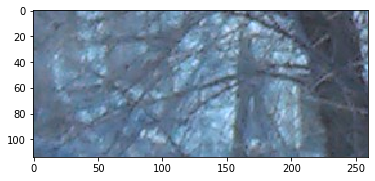

KeyboardInterrupt: 

In [536]:
good, bad, unknown = 0, 0, 0

for file in filepaths:
    if file.is_file():
        name = file.name

        if '_nolabel' in name:
            unknown += 1
        
        else:
            name = re.sub('\\s\\(2\\)', '', name)
            found = re.search('[A-Z]\d{3}[A-Z]{2}\\s\d{2,5}', name)
            if found:
                carnumber = found.group(0)
                region = carnumber.split(' ')[-1]
                
                if len(region) == 5:
                    carnumber = carnumber[:-2]
                    
                elif len(region) == 4:
                    if region[:-1] in region_codes:
                        carnumber = carnumber[:-1]
                    elif region[:-2] in region_codes:
                        carnumber = carnumber[:-2]
                        
                elif len(region) == 3:
                    splt = name.split('.')
                    short_name = splt[0][:-1] + '.' + splt[1]
                    
                    if short_name in all_filenames:
                        carnumber = short_name

                good += 1
            else:
                file_str = str(file)
                if file_str.endswith('jpg') or file_str.endswith('bmp'):
                    
                    img = cv2.imread(file_str)

                    clear_output()
                    print(file)
                    plt.imshow(img)
                    plt.show()
                    input()
    

In [438]:
good, bad, unknown

(4343, 1289, 516)

In [428]:
mainpath = '/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/'
yulpath = '/Users/alex/Downloads/NumBase/'

In [429]:
mainfiles = pathlib.Path(mainpath) 
mainfiles = list(mainfiles.glob('**/*'))
mainfilenames = [str(file.name) for file in mainfiles]
mainfiles = [str(file.name) for file in mainfiles]


yulfiles = pathlib.Path(yulpath) 
yulfiles = list(yulfiles.glob('**/*'))
yulfiles = [str(file) for file in yulfiles]

In [430]:
import shutil

In [432]:
for i, path in enumerate(yulfiles):
    if path.split('/')[-1] not in mainfilenames:
        print(path)
        print(mainpath + path.split('/')[-1])
        shutil.copyfile(path, mainpath + path.split('/')[-1])

/Users/alex/Downloads/NumBase/A000AA 127.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/A000AA 127.bmp
/Users/alex/Downloads/NumBase/P761XC 90.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/P761XC 90.bmp
/Users/alex/Downloads/NumBase/C065HK 7810.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/C065HK 7810.bmp
/Users/alex/Downloads/NumBase/M911AY 197.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/M911AY 197.bmp
/Users/alex/Downloads/NumBase/B262TC 77.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/B262TC 77.bmp
/Users/alex/Downloads/NumBase/E379XC 1971.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/E379XC 1971.bmp
/Users/alex/Downloads/NumBase/A119AO 77785.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/A119AO 77785.bmp
/Users/alex/Downloads/NumBase/A640PC 77.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/A640PC 77.bmp
/Users

/Users/alex/Downloads/NumBase/E693MM 177.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/E693MM 177.bmp
/Users/alex/Downloads/NumBase/B885TP 773.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/B885TP 773.bmp
/Users/alex/Downloads/NumBase/T548HE 770.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/T548HE 770.bmp
/Users/alex/Downloads/NumBase/C461TB 19921.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/C461TB 19921.bmp
/Users/alex/Downloads/NumBase/M358YY 199.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/M358YY 199.bmp
/Users/alex/Downloads/NumBase/O571KA 190.bmp
/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/O571KA 190.bmp


In [454]:
pathlib.Path('/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/A408CX 1992.bmp')

PosixPath('/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/A408CX 1992.bmp')

# transforms

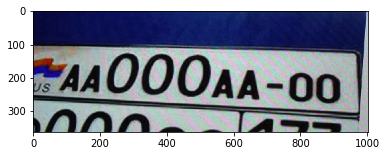

In [6]:
p = '/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/NumBase/T777OA 757.bmp'

import cv2

img = cv2.imread(p)
plt.imshow(img)

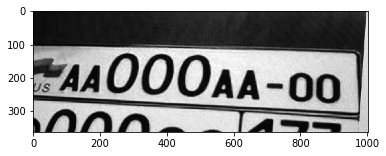

In [35]:
import torch

t_img = torch.from_numpy(img)
grayscaled = torch.zeros((t_img.shape[0], t_img.shape[1]))
coefs = [0.2989, 0.5870, 0.1140]

for i in range(3):
    grayscaled += t_img[:,:,i] * coefs[i]

plt.imshow(grayscaled.numpy(), cmap='gray')

In [88]:
grayscaled / 255.

tensor([[0.0685, 0.0685, 0.0724,  ..., 0.7213, 0.7381, 0.7578],
        [0.0646, 0.0685, 0.0685,  ..., 0.7253, 0.7420, 0.7617],
        [0.0607, 0.0646, 0.0685,  ..., 0.7315, 0.7448, 0.7617],
        ...,
        [0.6455, 0.6181, 0.5279,  ..., 0.7083, 0.6995, 0.6963],
        [0.6204, 0.5969, 0.5081,  ..., 0.6799, 0.6750, 0.6875],
        [0.6126, 0.5891, 0.5003,  ..., 0.6741, 0.6697, 0.6829]])

In [109]:
from torchvision.transforms.functional import resize
from torchvision.transforms.functional import to_pil_image

pil_img = to_pil_image(grayscaled / 255.)

resize(pil_img, (16,40), 2)

In [58]:
import PIL
PIL.Image.Image

PIL.Image.Image

In [31]:
t_img[:,:,0]

tensor([[ 12,  12,  13,  ..., 168, 174, 181],
        [ 11,  12,  12,  ..., 169, 175, 182],
        [ 10,  11,  12,  ..., 172, 177, 182],
        ...,
        [145, 138, 115,  ..., 194, 190, 188],
        [140, 134, 111,  ..., 187, 184, 186],
        [138, 132, 109,  ..., 186, 183, 186]], dtype=torch.uint8)

In [106]:
import random
import torchvision.transforms.functional as F

size = (100,200)

i = random.randint(0, t_img.shape[0] - size[0])
j = random.randint(1, t_img.shape[1] - size[1])
i,j

(226, 51)

In [112]:
np.array(F.crop(pil_img, i, j, size[0], size[1])).shape

(100, 200)

In [115]:
w, h = pil_img.size
w, h

(1003, 362)

In [117]:
def cal(image: PIL.Image.Image, out_size) ->  PIL.Image.Image:
    img_width, img_height = image.size
    out_height, out_width = out_size
    i = random.randint(0, img_height - out_height)
    j = random.randint(1, img_width - out_width)
    return F.crop(image, i, j, out_height, out_width)

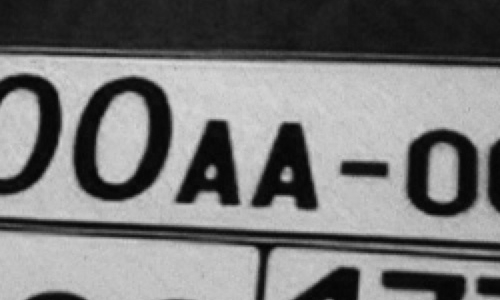

In [122]:
cal(pil_img, (300,500))

In [20]:
from torchvision.transforms.functional import to_grayscale, c
from PIL import Image
import numpy as np

pil = Image.fromarray(t_img)
np.array(to_grayscale(pil)).shape

AttributeError: 'Tensor' object has no attribute '__array_interface__'

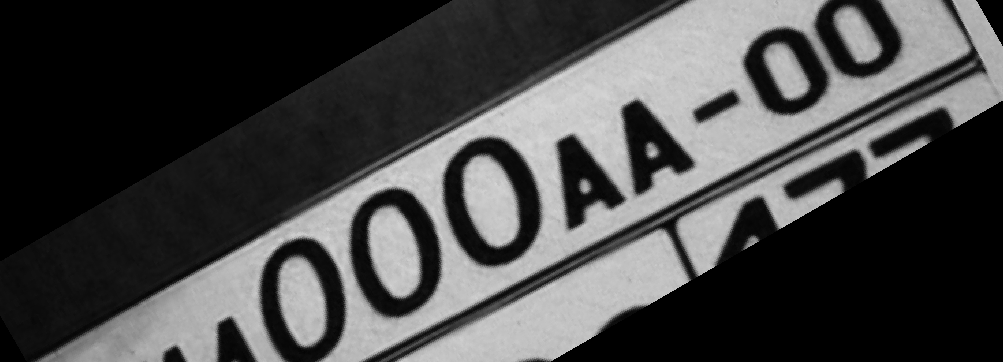

In [133]:
pil_img.rotate(30)

In [193]:
from albumentations import Compose, Blur, Transpose
import numpy as np

def strong_aug():
    return Compose([Blur(blur_limit=25, always_apply=True, p=1)])

In [203]:
np.array(pil_img)

array([[ 17,  17,  18, ..., 183, 188, 193],
       [ 16,  17,  17, ..., 184, 189, 194],
       [ 15,  16,  17, ..., 186, 189, 194],
       ...,
       [164, 157, 134, ..., 180, 178, 177],
       [158, 152, 129, ..., 173, 172, 175],
       [156, 150, 127, ..., 171, 170, 174]], dtype=uint8)

In [209]:
grayscaled.numpy() / 255

array([[0.06851295, 0.06851295, 0.07243412, ..., 0.72133803, 0.7380926 ,
        0.7578075 ],
       [0.06459177, 0.06851295, 0.06851295, ..., 0.72525924, 0.7420138 ,
        0.76172864],
       [0.06067059, 0.06459177, 0.06851295, ..., 0.73152465, 0.74480516,
        0.76172864],
       ...,
       [0.64554316, 0.61809486, 0.52790785, ..., 0.7082769 , 0.699498  ,
        0.6962596 ],
       [0.6204392 , 0.59691215, 0.508133  , ..., 0.67986786, 0.6750102 ,
        0.6874565 ],
       [0.61259687, 0.5890698 , 0.50029063, ..., 0.67409176, 0.66968113,
        0.6828525 ]], dtype=float32)

In [211]:
def cal(image: np.ndarray, blur_limit: int=10) -> np.ndarray:
    return Blur(blur_limit=blur_limit, p=1)(image=image)['image']

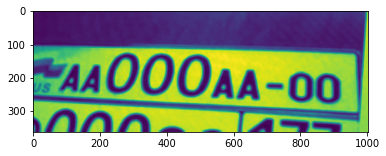

In [213]:
plt.imshow(cal(image=grayscaled.numpy() / 255))

In [236]:
from albumentations import GaussianBlur, GaussNoise, Solarize

aug = Solarize(threshold=0.5, p=1)(image=np.array(pil_img) / 255)['image']
plt.imshow(aug, cmap='gray')

KeyError: dtype('float64')

In [235]:
np.array(pil_img) / 255

array([[0.06666667, 0.06666667, 0.07058824, ..., 0.71764706, 0.7372549 ,
        0.75686275],
       [0.0627451 , 0.06666667, 0.06666667, ..., 0.72156863, 0.74117647,
        0.76078431],
       [0.05882353, 0.0627451 , 0.06666667, ..., 0.72941176, 0.74117647,
        0.76078431],
       ...,
       [0.64313725, 0.61568627, 0.5254902 , ..., 0.70588235, 0.69803922,
        0.69411765],
       [0.61960784, 0.59607843, 0.50588235, ..., 0.67843137, 0.6745098 ,
        0.68627451],
       [0.61176471, 0.58823529, 0.49803922, ..., 0.67058824, 0.66666667,
        0.68235294]])

In [31]:
c = 0
from progressbar import progressbar as pb

for i, item in pb(enumerate(dataset_paths.iterdir())):
    img = cv2.imread(str(item))
    if img.shape[-1] == 3:
        c += 1

| |                           #                    | 5069 Elapsed Time: 0:00:06


In [262]:
import os

path = '/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/'

In [265]:
filepaths = []

for path, subdirs, files in os.walk(path):
    for name in files:
        filepaths.append(os.path.join(path, name))
len(filepaths)

1268

In [264]:
for file in filepaths:
    if 'Negative' in file:
        print(file)
        break

/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/Negative/735.bmp


In [521]:
import cv2
import numpy as np
import pathlib
import re

from torch.utils.data import Dataset

class OcrDataset(Dataset):
    def __init__(self, path_to_data: str, transforms=None):
        # TODO: Here you can create samples from dirs and initialize transfroms
        self.__path_to_data = path_to_data
        self.__transforms = transforms
        self.__all_posix_filenames = self.__get_all_posix_filenames()
        self.__all_str_filenames = self.__get_all_str_filenames()
        self.__region_codes = self.__get_region_codes()

    def __get_region_codes(self):
        region_codes = list(np.arange(1, 100))
        region_codes.remove(20)
        region_codes.extend([102, 113, 116, 716, 121, 123, 193, 124, 125, 126, 134, 136,
                             138, 142, 147, 150, 190, 750, 152, 154, 156, 159, 161, 761, 163,
                             763, 164, 196, 173, 174, 177, 197, 199, 777, 797, 799, 178, 198, 186])

        region_codes = set(['0' + str(item) if len(str(item)) == 1 else str(item) for item in region_codes])
        return region_codes

    def __get_all_posix_filenames(self):
        dataset_paths = pathlib.Path(self.__path_to_data)
        return list(dataset_paths.glob('**/*'))

    def __get_all_str_filenames(self):
        return [str(file.name) for file in self.__all_posix_filenames if file.is_file()]

    def get_train_sample(self, path_to_file: str):
        img = cv2.imread(path_to_file)
        file = pathlib.Path(path_to_file)

        if file.is_file():
            name = file.name

            if '_nolabel' in name:
                return img, []

            name = re.sub('\\s\\(2\\)', '', name)
            found = re.search('[A-Z]\d{3}[A-Z]{2}\\s\d{2,5}', name)

            if found:
                carnumber = found.group(0)
                region = carnumber.split(' ')[-1]

                if len(region) == 5:
                    carnumber = carnumber[:-2]

                elif len(region) == 4:
                    if region[:-1] in self.__region_codes:
                        carnumber = carnumber[:-1]

                    elif region[:-2] in self.__region_codes:
                        carnumber = carnumber[:-2]

                elif len(region) == 3:
                    splt = name.split('.')
                    
                    short_name = splt[0][:-1] + '.' + splt[1]

                    if short_name in self.__all_str_filenames:
                        carnumber = short_name.split('.')[0]
                        
                return img, list(carnumber)
            else:
                return img, []

In [589]:
from cnd.ocr import dataset
from importlib import reload
reload(dataset)

<module 'cnd.ocr.dataset' from '/Users/alex/Python/Mag1/Tips-Tricks/project/cnd/ocr/dataset.py'>

In [590]:
dataset.OcrDataset

cnd.ocr.dataset.OcrDataset

In [581]:
OcrDataset

cnd.ocr.dataset.OcrDataset

/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/Negative/329.bmp



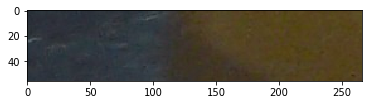

KeyboardInterrupt: 

In [591]:
while True:
    clear_output()
    pp = '/Users/alex/Python/Mag1/Tips-Tricks/project/CropNumbers/'
    ocr = dataset.OcrDataset(pp)
    cur_path = str(random.choice(filepaths))
    a = ocr.get_train_sample(cur_path)
    print(cur_path)
    plt.imshow(a[0])
    print(a[1])
    plt.show()
    input()

    